In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv('mexico-city-real-estate-1.csv')
df2 = pd.read_csv('mexico-city-real-estate-2.csv')
df3 = pd.read_csv('mexico-city-real-estate-3.csv')
df4 = pd.read_csv('mexico-city-real-estate-4.csv')
df5 = pd.read_csv('mexico-city-real-estate-5.csv')

In [3]:
df.dtypes

operation                      object
property_type                  object
place_with_parent_names        object
lat-lon                        object
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
dtype: object

In [4]:
df.head(5)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [5]:
df.drop(columns=['operation', 'price', 'currency', 'price_aprox_local_currency', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url'], inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(3839, 5)

In [8]:
df.head(5)

,property_type,place_with_parent_names,lat-lon,price_aprox_usd,price_per_m2
0,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",289775.66,101851.851900
1,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",79661.96,18900.000000
2,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",48822.82,9266.670000
3,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",337720.36,47481.481480
4,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.00,3326.996198


In [9]:
df['state'] = df['place_with_parent_names'].str.split('|', expand=True)[2]
df.dtypes

property_type               object
place_with_parent_names     object
lat-lon                     object
price_aprox_usd            float64
price_per_m2               float64
state                       object
dtype: object

In [10]:
df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True).astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3839 entries, 0 to 4627
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            3839 non-null   object 
 1   place_with_parent_names  3839 non-null   object 
 2   lat-lon                  3839 non-null   object 
 3   price_aprox_usd          3839 non-null   float64
 4   price_per_m2             3839 non-null   float64
 5   state                    3839 non-null   object 
 6   lat                      3839 non-null   float64
 7   lon                      3839 non-null   float64
dtypes: float64(4), object(4)
memory usage: 269.9+ KB


In [12]:
df.drop(columns=['place_with_parent_names', 'lat-lon'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3839 entries, 0 to 4627
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3839 non-null   object 
 1   price_aprox_usd  3839 non-null   float64
 2   price_per_m2     3839 non-null   float64
 3   state            3839 non-null   object 
 4   lat              3839 non-null   float64
 5   lon              3839 non-null   float64
dtypes: float64(4), object(2)
memory usage: 209.9+ KB


In [14]:
fig = px.scatter_mapbox(
    df, 
    lat = 'lat',
    lon = 'lon',
    center={'lat': 19.42, 'lon': -99.13},
    width=600,
    height=600,
    hover_data = ['price_aprox_usd'],
)

In [15]:
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [16]:
df['state'].value_counts()

state
Distrito Federal    3200
Quintana Roo         568
Solidaridad           42
Zacatecas             16
Benito Juárez         12
Othón P. Blanco        1
Name: count, dtype: int64

In [17]:
st.mstats.trimmed_var(df['lat'])

np.float64(0.1587391144038758)

In [18]:
df.describe()

,price_aprox_usd,price_per_m2,lat,lon
count,3.839000e+03,3.839000e+03,3839.000000,3839.000000
mean,2.718469e+05,2.253366e+04,19.716171,-97.266730
std,6.045877e+05,8.005500e+04,0.801886,4.545244
min,6.585810e+03,2.123116e+01,18.015418,-102.611172
25%,6.153781e+04,1.013831e+04,19.362864,-99.187731
50%,1.264476e+05,1.628050e+04,19.399815,-99.152302
75%,2.589268e+05,2.896696e+04,19.469689,-99.098524
max,2.008064e+07,4.750000e+06,23.634501,-86.744965


In [19]:
a = df['price_per_m2']
b = df['price_aprox_usd']
cor = a.corr(b)
cor

np.float64(0.0192865509529629)

In [20]:
df['area'] = (df['price_aprox_usd'] / df['price_per_m2']).round(2)
df.head()

,property_type,price_aprox_usd,price_per_m2,state,lat,lon,area
0,apartment,289775.66,101851.851900,Distrito Federal,23.634501,-102.552788,2.85
1,house,79661.96,18900.000000,Distrito Federal,19.310330,-99.068557,4.21
2,apartment,48822.82,9266.670000,Distrito Federal,19.279771,-99.234597,5.27
3,apartment,337720.36,47481.481480,Distrito Federal,23.634501,-102.552788,7.11
4,apartment,875000.00,3326.996198,Quintana Roo,21.190264,-86.819838,263.00


In [21]:
df.rename(columns={'area': 'area_m2'}, inplace=True)
df.head()

,property_type,price_aprox_usd,price_per_m2,state,lat,lon,area_m2
0,apartment,289775.66,101851.851900,Distrito Federal,23.634501,-102.552788,2.85
1,house,79661.96,18900.000000,Distrito Federal,19.310330,-99.068557,4.21
2,apartment,48822.82,9266.670000,Distrito Federal,19.279771,-99.234597,5.27
3,apartment,337720.36,47481.481480,Distrito Federal,23.634501,-102.552788,7.11
4,apartment,875000.00,3326.996198,Quintana Roo,21.190264,-86.819838,263.00


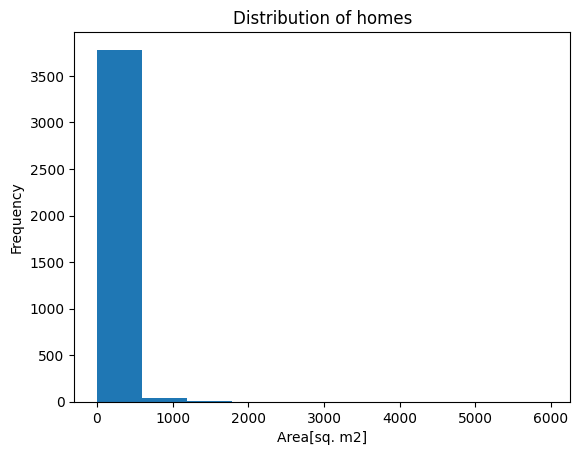

In [22]:
plt.hist(df['area_m2'])
plt.xlabel('Area[sq. m2]')
plt.ylabel('Frequency')
plt.title('Distribution of homes');

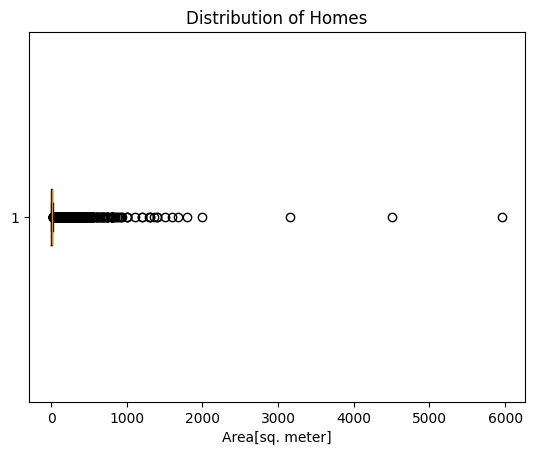

In [23]:
plt.boxplot(df['area_m2'], vert=False)
plt.xlabel("Area[sq. meter]")
plt.title("Distribution of Homes");

In [24]:
a = df.groupby(['state'])['price_aprox_usd'].mean()
b = a.sort_values(ascending=False)
b

state
Quintana Roo        434652.674683
Solidaridad         334709.193571
Distrito Federal    243830.840550
Zacatecas            92539.915000
Benito Juárez        73089.721667
Othón P. Blanco      63223.780000
Name: price_aprox_usd, dtype: float64

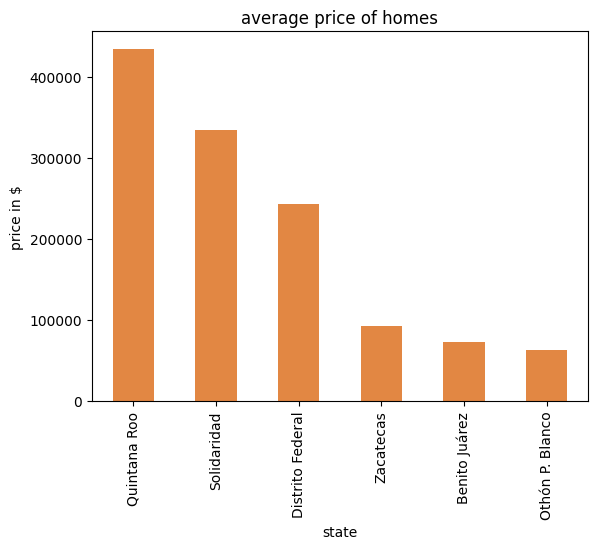

In [25]:
b.plot(
    kind="bar",
    xlabel="state",
    ylabel="price in $",
    title="average price of homes",
    color="#e28743",
);

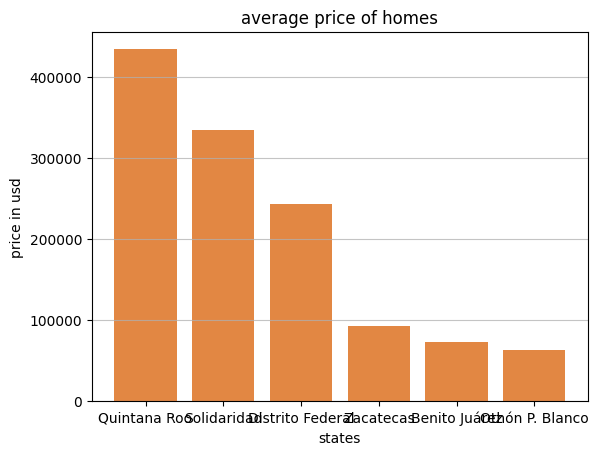

In [28]:
plt.Figure(figsize=(15, 5))
plt.bar(b.index, b.values, color="#e28743")
plt.xlabel("states")
plt.ylabel("price in usd")
plt.title("average price of homes")
plt.grid(axis="y", alpha=0.75);

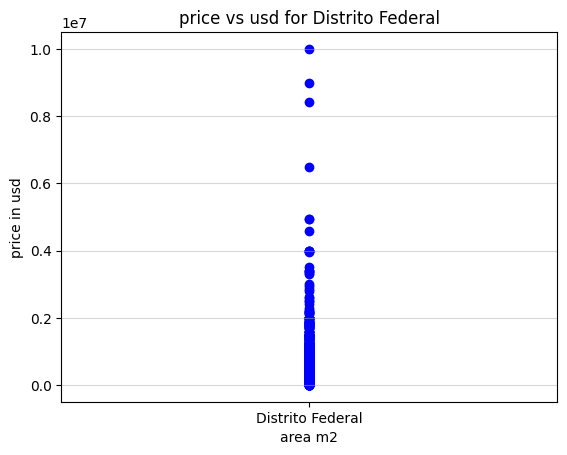

In [41]:
df_mexico_city = df[df['state'] == 'Distrito Federal']
area = df_mexico_city['state']
price = df_mexico_city['price_aprox_usd']

plt.scatter(x=area, y=price, color="blue")
plt.xlabel("area m2")
plt.ylabel("price in usd")
plt.title("price vs usd for Distrito Federal")
plt.grid(axis="y", alpha=0.5);